In [1]:
from os.path import abspath, sep, pardir
import sys
sys.path.append(abspath('') + sep + pardir + sep )
import MPL_style

In [2]:
def find(s, ch):
    return [i for i, ltr in enumerate(s) if ltr == ch]
pwd_p=abspath('')
idxs=find(pwd_p, sep)
path_GIT=pwd_p[:idxs[-2]] + sep

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.io as sio

summary_wo_noise_2palg.mat
summary_2palg_precisionaddnoise_S1e-01.mat
summary_2palg_precisionround_S1e-01.mat
summary_2palg_precisionfull_S1e-01.mat
summary_w_noise_2palg.mat

In [4]:
isim=1  #index for network instance

### plot original connectivity matrix

In [5]:
W_orig=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "data_linear_T100_dt1e-03_Nnodes30_Nincoming5_sigma1e-01wo_noise_I{}.mat".format(isim))["adjacency"]

W_orig2=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "data_linear_T100_dt1e-03_Nnodes30_Nincoming5_sigma1e-01w_noise_I{}.mat".format(isim))["adjacency"]


In [6]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

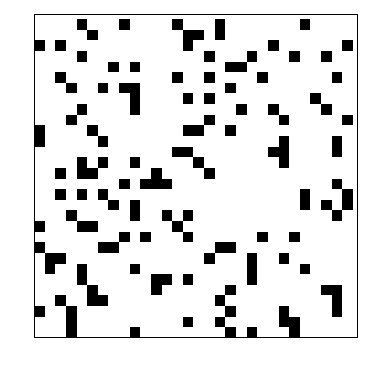

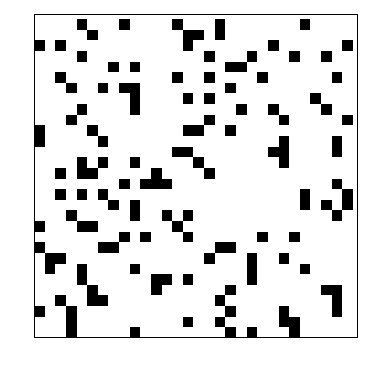

In [7]:
fig=plt.figure(figsize=(6,5))
plt.subplots_adjust(bottom=0.05, left=0.05, top=0.95)
ax=plt.subplot(111)
plt.imshow(W_orig, cmap="binary")
#plt.colorbar()
plt.axis("off")
plt.axhline(-0.5, color="k")
plt.axhline(30, color="k")
plt.axvline(-0.5, color="k")
plt.axvline(30, color="k")
plt.axis([-0.5, 30, -.5, 30])
plt.show()
fig.savefig("W_orig.pdf", dpi=200)

fig=plt.figure(figsize=(6,5))
plt.subplots_adjust(bottom=0.05, left=0.05, top=0.95)
ax=plt.subplot(111)
plt.imshow(W_orig2, cmap="binary")
#plt.colorbar()
plt.axis("off")
plt.axhline(-0.5, color="k")
plt.axhline(30, color="k")
plt.axvline(-0.5, color="k")
plt.axvline(30, color="k")
plt.axis([-0.5, 30, -.5, 30])
plt.show()
fig.savefig("W_orig2.pdf", dpi=200)

In [8]:
### time series with noise

In [9]:
x_all_wo=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "data_linear_T100_dt1e-03_Nnodes30_Nincoming5_sigma1e-01wo_noise_I{}.mat".format(isim))["x_all"]
x_all_w=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "data_linear_T100_dt1e-03_Nnodes30_Nincoming5_sigma1e-01w_noise_I{}.mat".format(isim))["x_all"]


[18 17  6]


<Figure size 432x288 with 0 Axes>

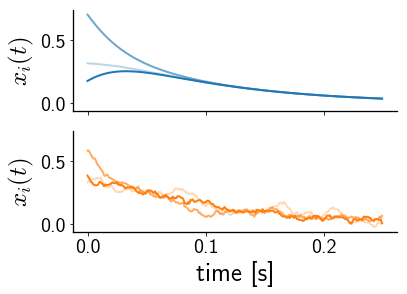

In [10]:
Tmax=250
Nseries=3
dt=1e-3
time=np.arange(Tmax)*dt
alphas=np.linspace(0.3, 1, Nseries)
idxs=np.random.choice(x_all_wo.shape[0], Nseries, replace=False)
print(idxs)
fig=plt.figure()

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.subplots_adjust( bottom=0.18, top=0.95, left=0.15)
for i in range(Nseries):
    ax1.plot(time,x_all_wo[idxs[i],:Tmax].T, color="C0", alpha=alphas[i])
    ax2.plot(time,x_all_w[idxs[i],:Tmax].T,  color="C1", alpha=alphas[i])
plt.xlabel("time [s]")
ax1.set_ylabel("$x_i(t)$")
ax2.set_ylabel("$x_i(t)$")
plt.show()
fig.savefig("timeseries.pdf", dpi=200)

In [54]:
## reconstructed connectivity matrices
W_all_wo=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "summary_smaller_wo_noise_nextstepalg.mat")["all_dfs"][isim-1,:,:]
W_all_w=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "summary_smaller_w_noise_nextstepalg.mat")["all_dfs"][isim-1,:,:]
W_orig=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "data_linear_T100_dt1e-03_Nnodes15_Nincoming3_sigma1e-01wo_noise_I{}.mat".format(isim))["adjacency"]
auc_w=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "summary_smaller_w_noise_nextstepalg.mat")["all_AUCS"]

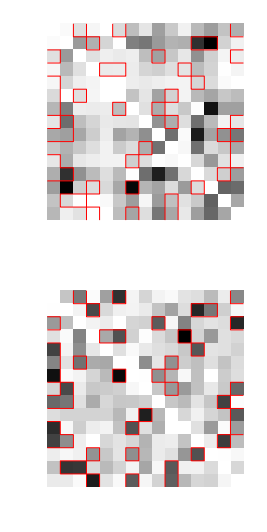

In [55]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(4.5,9))

ax1.axis("off")
image = np.empty(shape=(W_all_w.shape[0]+2, W_all_w.shape[1]+2))*np.nan
image[1:-1, 1:-1] = W_orig
image2 = np.empty(shape=(W_all_w.shape[0]+2, W_all_w.shape[1]+2))*np.nan
image2[1:-1, 1:-1] = np.fabs(W_all_wo)
f = lambda x,y: image[int(y),int(x) ]
g = np.vectorize(f)
x = np.linspace(0,image.shape[1], image.shape[1]*100)
y = np.linspace(0,image.shape[0], image.shape[0]*100)
X, Y= np.meshgrid(x[:-1],y[:-1])
Z = g(X[:-1],Y[:-1])

ax1.imshow(image2[::-1], origin="lower", interpolation="none", cmap="gray_r")
ax1.contour(Z[::-1], [0.5], colors='r', linewidths=[1], 
            extent=[0-0.5, x[:-1].max()-0.5,0-0.5, y[:-1].max()-0.5])

#with noise
ax2.axis("off")
image = np.empty(shape=(W_all_w.shape[0]+2, W_all_w.shape[1]+2))*np.nan
image[1:-1, 1:-1] = W_orig
image2 = np.empty(shape=(W_all_w.shape[0]+2, W_all_w.shape[1]+2))*np.nan
image2[1:-1, 1:-1] = np.fabs(W_all_w)
f = lambda x,y: image[int(y),int(x) ]
g = np.vectorize(f)
x = np.linspace(0,image.shape[1], image.shape[1]*100)
y = np.linspace(0,image.shape[0], image.shape[0]*100)
X, Y= np.meshgrid(x[:-1],y[:-1])
Z = g(X[:-1],Y[:-1])

ax2.imshow(image2[::-1], origin="lower", interpolation="none", cmap="gray_r")
ax2.contour(Z[::-1], [0.5], colors='r', linewidths=[1], 
            extent=[0-0.5, x[:-1].max()-0.5,0-0.5, y[:-1].max()-0.5])

plt.show()
fig.savefig("reconstructed_conn.pdf", dpi=500)

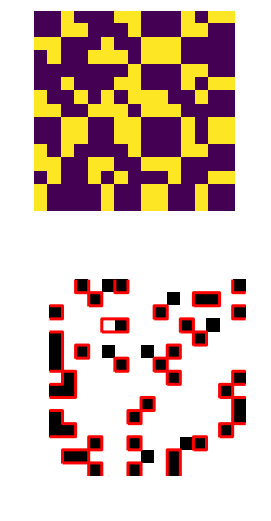

0.005040613834480427


In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(4.5,9))
ax1.axis("off")
ax2.axis("off")

flat_orig = W_orig.flatten()
flat_orig[flat_orig>0]=1

#wo noise
flat_rec = W_all_wo.flatten()
fpr, tpr, thresholds = metrics.roc_curve(flat_orig,np.fabs(flat_rec),pos_label=1)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

W_constr_wo=np.zeros_like(W_all_wo)
W_constr_wo[W_all_wo>optimal_threshold]=1
ax1.imshow(W_constr_wo)

#w noise
flat_rec = W_all_w.flatten()
fpr, tpr, thresholds = metrics.roc_curve(flat_orig,np.fabs(flat_rec),pos_label=1)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

W_constr_w=np.zeros_like(W_all_w)            
W_constr_w[W_all_w>optimal_threshold]=1

#with noise
ax2.axis("off")
image = np.empty(shape=(W_all_w.shape[0]+2, W_all_w.shape[1]+2))*np.nan
image[1:-1, 1:-1] = W_orig
image2 = np.empty(shape=(W_all_w.shape[0]+2, W_all_w.shape[1]+2))*np.nan
image2[1:-1, 1:-1] = np.fabs(W_constr_w)
f = lambda x,y: image[int(y),int(x) ]
g = np.vectorize(f)
x = np.linspace(0,image.shape[1], image.shape[1]*100)
y = np.linspace(0,image.shape[0], image.shape[0]*100)
X, Y= np.meshgrid(x[:-1],y[:-1])
Z = g(X[:-1],Y[:-1])

ax2.imshow(image2[::-1], origin="lower", interpolation="none", cmap="gray_r")
ax2.contour(Z[::-1], [0.5], colors='r', linewidths=[3], 
            extent=[0-0.5, x[:-1].max()-0.5,0-0.5, y[:-1].max()-0.5])
plt.show()

print(optimal_threshold)

In [13]:
## plot ROC curve
from sklearn import metrics

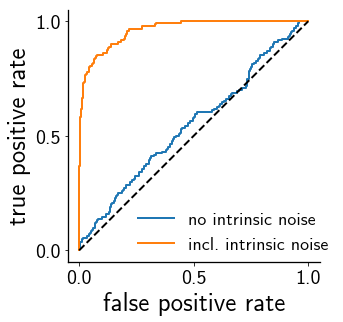

In [38]:
## test AUC and reconstrucution
fig = plt.figure(figsize=(5,5))
ax=plt.subplot(111)
plt.subplots_adjust(bottom=0.15, top=0.85, left=0.15, right=0.85)

flat_orig = W_orig.flatten()
flat_orig[flat_orig>0]=1

#wo noise
flat_rec = W_all_wo.flatten()
fpr, tpr, thresholds = metrics.roc_curve(flat_orig,np.fabs(flat_rec),pos_label=1)
AUCs=metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label="no intrinsic noise")

#wo noise
flat_rec = W_all_w.flatten()
fpr, tpr, thresholds = metrics.roc_curve(flat_orig,np.fabs(flat_rec),pos_label=1)
AUCs=metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label="incl. intrinsic noise")
plt.plot([0,1], [0,1], "k--")
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.legend(frameon=False, loc=(0.25,0.01))
plt.show()

fig.savefig("ROC_curves.pdf",dpi=200)


In [15]:
isim

1

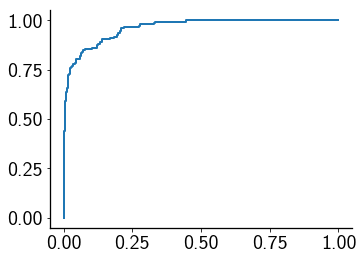

In [16]:
plt.plot(fpr, tpr)
plt.show()


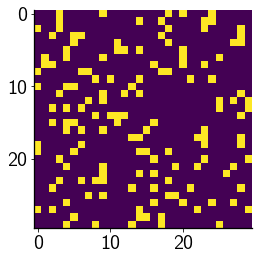

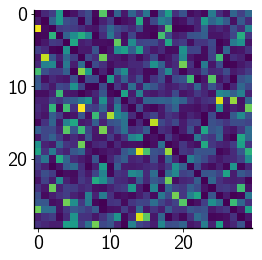

In [17]:
plt.imshow(W_orig)
plt.show()
plt.imshow(np.fabs(W_all_w))
plt.show()

#### A=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/summary_wo_noise_2palg.mat")

In [18]:
## test

In [19]:
## reconstructed connectivity matrices
isim=1
W_all_wo=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "summary_wo_noise_nextstepalg.mat")["all_dfs"][isim,:,:]
W_all_w=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "summary_w_noise_nextstepalg.mat")["all_dfs"][isim,:,:]
W_orig=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "data_linear_T100_dt1e-03_Nnodes30_Nincoming5_sigma1e-01wo_noise_I{}.mat".format(isim))["adjacency"]
auc_w=sio.loadmat(path_GIT+"proof_of_concept/strawman wo noise/simulations/"+
       "summary_w_noise_nextstepalg.mat")["all_AUCS"]

In [20]:
W_all_wo[:,0], W_all_w[0,:]
#0    0.0805    0.1541    0.0376   -0.0023   -0.0556    0.1972    0.0333    0.0861

(array([ 0.        , -0.02779061,  0.00270329, -0.06968502,  0.03290622,
        -0.00331752, -0.1611696 , -0.01137753, -0.03632045,  0.09589922,
         0.13909729,  0.04696568,  0.03585495,  0.05371469,  0.02683905,
         0.04080045, -0.04702253, -0.07893923,  0.04665   , -0.03070912,
         0.24178968,  0.06466779,  0.12157587,  0.15669633,  0.01221073,
        -0.0612777 ,  0.04581762, -0.01754736,  0.07920471, -0.025586  ]),
 array([ 0.00000000e+00, -6.75449052e-04,  1.48087865e-03,  9.61751535e-03,
         1.46011925e-02, -7.26948689e-04, -1.07872352e-03, -3.95913380e-03,
        -9.68973577e-05, -2.64660234e-03, -4.69562354e-03,  1.76498613e-03,
        -1.42658954e-03, -4.03482374e-03,  9.23243529e-03,  6.07110278e-04,
         3.44377743e-03,  6.07543425e-04,  1.70219081e-03,  6.69714042e-03,
         9.03153855e-03,  7.45102859e-04,  5.01338456e-03, -3.55823324e-04,
         2.99020406e-04, -2.55726279e-04, -3.08869518e-03,  1.79777970e-03,
         1.80305378e-03,  6.

In [21]:
auc_w

array([[0.96137382],
       [0.96157993],
       [0.95883051],
       [0.96797442],
       [0.9534759 ],
       [0.94370867],
       [0.95965345],
       [0.96323721],
       [0.95315789],
       [0.9467367 ],
       [0.96281541],
       [0.9599851 ],
       [0.9701393 ],
       [0.94309203],
       [0.96711347],
       [0.95081069],
       [0.96648014],
       [0.95581556],
       [0.93309302],
       [0.95111915],
       [0.95651455],
       [0.956878  ],
       [0.96272624],
       [0.97038625],
       [0.94655717],
       [0.96315586],
       [0.9705596 ],
       [0.94532998],
       [0.95743251],
       [0.95773464],
       [0.95832274],
       [0.95989039],
       [0.96206963],
       [0.95476182],
       [0.97719778],
       [0.95435608],
       [0.95051624],
       [0.9548703 ],
       [0.96062059],
       [0.95008628],
       [0.94768006],
       [0.96527974],
       [0.95438029],
       [0.96156571],
       [0.95111006],
       [0.9684928 ],
       [0.95077344],
       [0.969